In [1064]:
##ALY 6020 Final Exam
pip install pandas

SyntaxError: invalid syntax (3735595100.py, line 2)

In [1066]:
##Importing both datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the file path
file_path1 = 'C:\\Users\\seanm\\Downloads\\Stroke Dataset.xlsx'
file_path2 = 'C:\\Users\\seanm\\Downloads\\Cancer Dataset.xlsx'

# Read the sheets into separate DataFrames
stroke_df = pd.read_excel(file_path1, sheet_name='Stroke Dataset')
cancer_df = pd.read_excel(file_path2, sheet_name='Cancer Dataset')

In [1068]:
##Summary Statistics for both datasets
# Display the first few rows of the Stroke DataFrame
print(stroke_df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [1070]:
# Display the first few rows of the Cancer DataFrame
print(cancer_df.head())

   avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0       1397.0               469          489.8      61898      260131   
1        173.0                70          411.6      48127       43269   
2        102.0                50          349.7      49348       21026   
3        427.0               202          430.4      44243       75882   
4         57.0                26          350.1      49955       10321   

   povertyPercent  studyPerCap           binnedInc  MedianAge  MedianAgeMale  \
0            11.2   499.748204   (61494.5, 125635]       39.3           36.9   
1            18.6    23.111234  (48021.6, 51046.4]       33.0           32.2   
2            14.6    47.560164  (48021.6, 51046.4]       45.0           44.0   
3            17.1   342.637253    (42724.4, 45201]       42.8           42.2   
4            12.5     0.000000  (48021.6, 51046.4]       48.3           47.8   

   ...  PctEmpPrivCoverage PctPublicCoverage  PctPublicCoverageAlone  \
0 

In [1072]:
## Get descriptive statistics for Stroke Dataset
summary_stats = stroke_df.describe()
print(summary_stats)

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [1074]:
## Get descriptive statistics for Cancer Dataset
summary_stats = cancer_df.describe()
print(summary_stats)

        avgAnnCount  avgDeathsPerYear  incidenceRate      medIncome  \
count   3047.000000       3047.000000    3047.000000    3047.000000   
mean     606.338544        185.965868     448.268586   47063.281917   
std     1416.356223        504.134286      54.560733   12040.090836   
min        6.000000          3.000000     201.300000   22640.000000   
25%       76.000000         28.000000     420.300000   38882.500000   
50%      171.000000         61.000000     453.549422   45207.000000   
75%      518.000000        149.000000     480.850000   52492.000000   
max    38150.000000      14010.000000    1206.900000  125635.000000   

         popEst2015  povertyPercent  studyPerCap    MedianAge  MedianAgeMale  \
count  3.047000e+03     3047.000000  3047.000000  3047.000000    3047.000000   
mean   1.026374e+05       16.878175   155.399415    45.272333      39.570725   
std    3.290592e+05        6.409087   529.628366    45.304480       5.226017   
min    8.270000e+02        3.200000     

In [1076]:
## Data Types in the Stroke Dataset
# Display the data type of each variable
print(stroke_df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [1078]:
## Data Types in the Cancer Dataset
# Display the data type of each variable
print(cancer_df.dtypes)

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [1080]:
## Step 1: Preprocessing/Data Cleaning
#Count missing values in each column of the Stroke dataset
missing_data = stroke_df.isnull().sum()

# Display missing data counts
print("Missing Data:\n", missing_data)

Missing Data:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [1082]:
## Count missing values in each column of the Cancer dataset
missing_data = cancer_df.isnull().sum()

# Display missing data counts
print("Missing Data:\n", missing_data)

Missing Data:
 avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace             

In [1084]:
## Removing the column 'PctSomeCol18_24' and 'binnedInc' from the Cancer Dataset
cancer_df = cancer_df.drop(columns=['PctSomeCol18_24', 'binnedInc'])

# Display the DataFrame after removal
print(cancer_df.head())

   avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0       1397.0               469          489.8      61898      260131   
1        173.0                70          411.6      48127       43269   
2        102.0                50          349.7      49348       21026   
3        427.0               202          430.4      44243       75882   
4         57.0                26          350.1      49955       10321   

   povertyPercent  studyPerCap  MedianAge  MedianAgeMale  MedianAgeFemale  \
0            11.2   499.748204       39.3           36.9             41.7   
1            18.6    23.111234       33.0           32.2             33.7   
2            14.6    47.560164       45.0           44.0             45.8   
3            17.1   342.637253       42.8           42.2             43.4   
4            12.5     0.000000       48.3           47.8             48.9   

   ... PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone  \
0  ...              

In [1086]:
##Replace Missing Values in Stroke dataset with the mean value
# Select only the numerical columns
numerical_columns = stroke_df.select_dtypes(include=['number']).columns

# Impute missing values with the median (or mean) only in numerical columns
stroke_df[numerical_columns] = stroke_df[numerical_columns].fillna(stroke_df[numerical_columns].median())

# Display the DataFrame after imputation
print(stroke_df.head())

# Count missing values in each column of the stroke dataset
missing = stroke_df.isnull().sum()

# Display missing data counts
print("Missing Data:\n", missing)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Missing Data:
 id                   0
gender            

In [1088]:
##Replace Missing Values in Cancer dataset with the mean value
# Select only the numerical columns
numerical_columns = cancer_df.select_dtypes(include=['number']).columns

# Impute missing values with the median (or mean) only in numerical columns
cancer_df[numerical_columns] = cancer_df[numerical_columns].fillna(cancer_df[numerical_columns].median())

# Display the DataFrame after imputation
print(cancer_df.head())

# Count missing values in each column of the stroke dataset
missing_data = cancer_df.isnull().sum()

# Display missing data counts
print("Missing Data:\n", missing_data)

   avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0       1397.0               469          489.8      61898      260131   
1        173.0                70          411.6      48127       43269   
2        102.0                50          349.7      49348       21026   
3        427.0               202          430.4      44243       75882   
4         57.0                26          350.1      49955       10321   

   povertyPercent  studyPerCap  MedianAge  MedianAgeMale  MedianAgeFemale  \
0            11.2   499.748204       39.3           36.9             41.7   
1            18.6    23.111234       33.0           32.2             33.7   
2            14.6    47.560164       45.0           44.0             45.8   
3            17.1   342.637253       42.8           42.2             43.4   
4            12.5     0.000000       48.3           47.8             48.9   

   ... PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone  \
0  ...              

In [1090]:
##Converting all categorical varibles to numerical in the Stroke Dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of ordinal variables
ordinal_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize the LabelEncoder
label_encoders = {}

for var in ordinal_vars:
    le = LabelEncoder()
    stroke_df[var] = le.fit_transform(stroke_df[var])
    label_encoders[var] = le

# Verify the conversion
print(stroke_df[ordinal_vars].head(10))

summary_stats = stroke_df.describe()
print(summary_stats)

   gender  ever_married  work_type  Residence_type  smoking_status
0       1             1          2               1               1
1       0             1          3               0               2
2       1             1          2               0               2
3       0             1          2               1               3
4       0             1          3               0               2
5       1             1          2               1               1
6       1             1          2               0               2
7       0             0          2               1               2
8       0             1          2               0               0
9       0             1          2               1               0
                 id       gender          age  hypertension  heart_disease  \
count   5110.000000  5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354     0.414286    43.226614      0.097456       0.054012   
std    21161.721625     0.493

In [1092]:
##Remove incorrect values in the 'MedianAge' column of the Cancer dataset and replace them with the mean value
import pandas as pd

# Define the column name
age_column = 'MedianAge'  # Replace with your actual column name

# Calculate the mean of the valid age values (excluding the erroneous values)
valid_mean_age = cancer_df[(cancer_df[age_column] < 349.2) | (cancer_df[age_column] > 624)][age_column].mean()

# Identify and print the rows with incorrect age values for verification
incorrect_rows = cancer_df[(cancer_df[age_column] >= 349.2) & (cancer_df[age_column] <= 624)]
print("Rows with incorrect age values:")
print(incorrect_rows)

# Replace the incorrect values with the calculated mean
cancer_df.loc[(cancer_df[age_column] >= 349.2) & (cancer_df[age_column] <= 624), age_column] = valid_mean_age

# Verify the changes by checking the summary statistics
print("Updated DataFrame summary:")
print(cancer_df[age_column].describe())

Rows with incorrect age values:
      avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
100     89.000000                32     447.200000      61802       17110   
181    564.000000               188     395.400000      56142      139394   
225    346.000000               156     399.000000      44207       62194   
318    186.000000                93     406.200000      37122       25345   
425    230.000000                98     477.800000      45841       39259   
606     35.000000                12     538.800000      36449        4251   
637    140.000000                59     478.000000      66522       25512   
843    599.000000               250     489.900000      39927      128755   
991     85.000000                32     404.000000      61762       19162   
1199   959.000000               398     497.400000      41010      201410   
1312  1962.667684                 4     453.549422      53739        1670   
1406   883.000000               329     389.

In [1094]:
##Check updated summary statistics of the Cancer dataset
summary_stats = cancer_df.describe()
print(summary_stats)

        avgAnnCount  avgDeathsPerYear  incidenceRate      medIncome  \
count   3047.000000       3047.000000    3047.000000    3047.000000   
mean     606.338544        185.965868     448.268586   47063.281917   
std     1416.356223        504.134286      54.560733   12040.090836   
min        6.000000          3.000000     201.300000   22640.000000   
25%       76.000000         28.000000     420.300000   38882.500000   
50%      171.000000         61.000000     453.549422   45207.000000   
75%      518.000000        149.000000     480.850000   52492.000000   
max    38150.000000      14010.000000    1206.900000  125635.000000   

         popEst2015  povertyPercent  studyPerCap    MedianAge  MedianAgeMale  \
count  3.047000e+03     3047.000000  3047.000000  3047.000000    3047.000000   
mean   1.026374e+05       16.878175   155.399415    40.823865      39.570725   
std    3.290592e+05        6.409087   529.628366     5.171278       5.226017   
min    8.270000e+02        3.200000     

In [1096]:
##Separate County and State in the Cancer Dataset
import pandas as pd

# Extract State and County
cancer_df[['County', 'State']] = cancer_df['Geography'].str.split(', ', expand=True)

# Drop the original Geography column if no longer needed
cancer_df.drop(columns=['Geography'], inplace=True)

# Check the first few rows to ensure correct extraction
print(cancer_df[['County', 'State']].head())

             County       State
0     Kitsap County  Washington
1   Kittitas County  Washington
2  Klickitat County  Washington
3      Lewis County  Washington
4    Lincoln County  Washington


In [1098]:
##Convert State to Numerical Values in the Cancer dataset
from sklearn.preprocessing import LabelEncoder

# Label Encoding for State
label_encoder = LabelEncoder()
cancer_df['State_encoded'] = label_encoder.fit_transform(cancer_df['State'])

# Prepare data for modeling
x = cancer_df.drop(columns=['TARGET_deathRate', 'State', 'County'])
y = cancer_df['TARGET_deathRate']

# Check the resulting DataFrame
print(cancer_df[['County', 'State', 'State_encoded']].head(100))

## Removing the column 'PctSomeCol18_24' from the Cancer Dataset
cancer_df = cancer_df.drop(columns=['County', 'State'])

# Display the DataFrame after removal
print(cancer_df.head())


                County       State  State_encoded
0        Kitsap County  Washington             47
1      Kittitas County  Washington             47
2     Klickitat County  Washington             47
3         Lewis County  Washington             47
4       Lincoln County  Washington             47
..                 ...         ...            ...
95     Florence County   Wisconsin             49
96  Fond du Lac County   Wisconsin             49
97       Forest County   Wisconsin             49
98        Grant County   Wisconsin             49
99        Green County   Wisconsin             49

[100 rows x 3 columns]
   avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0       1397.0               469          489.8      61898      260131   
1        173.0                70          411.6      48127       43269   
2        102.0                50          349.7      49348       21026   
3        427.0               202          430.4      44243       75882   
4     

In [1100]:
summary_stats = cancer_df.describe()
print(summary_stats)

        avgAnnCount  avgDeathsPerYear  incidenceRate      medIncome  \
count   3047.000000       3047.000000    3047.000000    3047.000000   
mean     606.338544        185.965868     448.268586   47063.281917   
std     1416.356223        504.134286      54.560733   12040.090836   
min        6.000000          3.000000     201.300000   22640.000000   
25%       76.000000         28.000000     420.300000   38882.500000   
50%      171.000000         61.000000     453.549422   45207.000000   
75%      518.000000        149.000000     480.850000   52492.000000   
max    38150.000000      14010.000000    1206.900000  125635.000000   

         popEst2015  povertyPercent  studyPerCap    MedianAge  MedianAgeMale  \
count  3.047000e+03     3047.000000  3047.000000  3047.000000    3047.000000   
mean   1.026374e+05       16.878175   155.399415    40.823865      39.570725   
std    3.290592e+05        6.409087   529.628366     5.171278       5.226017   
min    8.270000e+02        3.200000     

In [1102]:
##Step 2 Modeling
#Stroke Dataset Models
#Split Data into Training and Testing Sets
# Separate features and target variable
x = stroke_df.drop(columns=['id', 'stroke'])
y = stroke_df['stroke']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Check the shape of the datasets
print(f'Training set shape: {x_train.shape}, Test set shape: {x_test.shape}')

Training set shape: (3577, 10), Test set shape: (1533, 10)


In [1104]:
##Train The Models
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(x_test)

In [1106]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

In [1108]:
##Evaluate the Models
# Classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


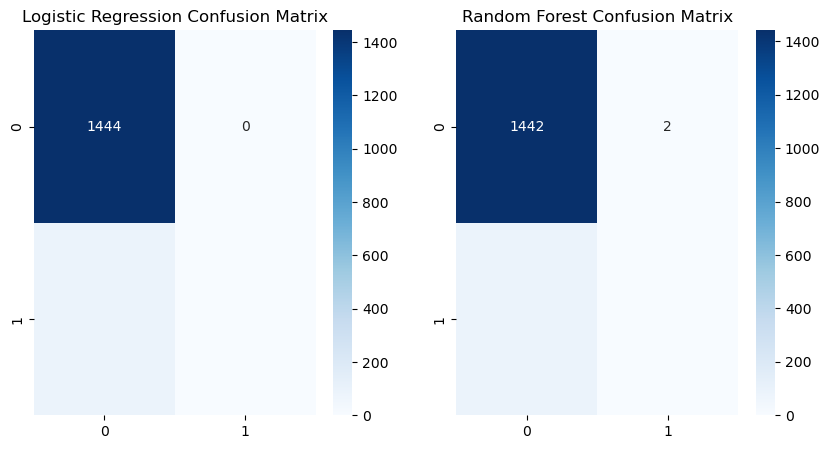

In [1110]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

# Confusion Matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.show()

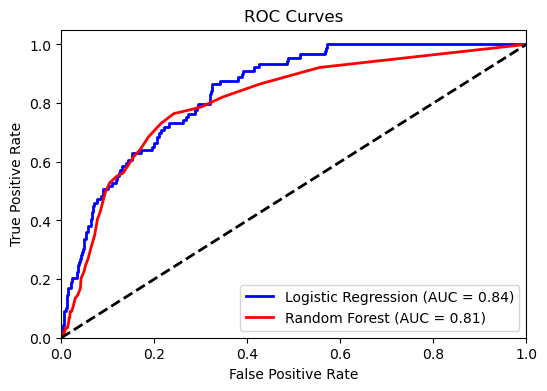

In [1112]:
# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
roc_auc_log = auc(fpr_log, tpr_log)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:       TARGET_deathRate   No. Observations:                 2437
Model:                            GLM   Df Residuals:                     2405
Model Family:                Gaussian   Df Model:                           31
Link Function:               Identity   Scale:                          362.04
Method:                          IRLS   Log-Likelihood:                -10621.
Date:                Sat, 17 Aug 2024   Deviance:                   8.7070e+05
Time:                        02:52:09   Pearson chi2:                 8.71e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6692
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

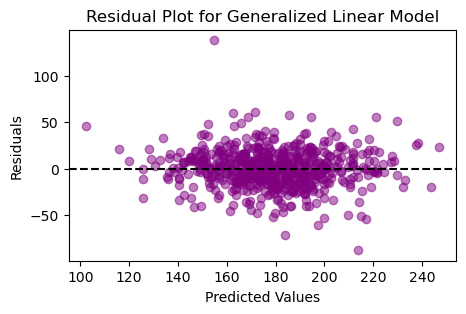

In [1114]:
##Cancer Dataset Models
#Generalized Linear Regression (GLM)
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
x = cancer_df.drop(columns=['TARGET_deathRate'])
y = cancer_df['TARGET_deathRate']

# Standardize numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert scaled features back to a DataFrame with the original column names
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

# Fit the GLM model
glm_model = sm.GLM(y_train, x_train_const, family=sm.families.Gaussian()).fit()

# Print the summary of the GLM model
print(glm_model.summary())

# Access and display coefficients with feature names
coefficients = glm_model.params
print(coefficients)

# Visualization: Residual Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.scatter(y_pred_glm, y_test - y_pred_glm, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Generalized Linear Model')
plt.show()

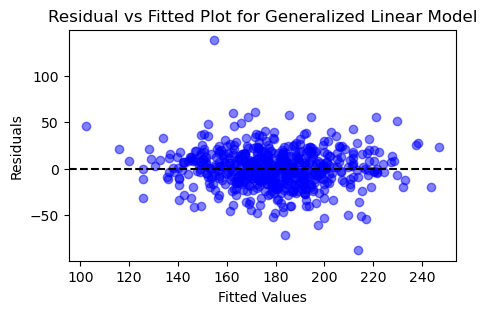

In [1116]:
##Data Visualizations for Generalized Linear Regression (GLM)
#Residual vs. Fitted Plot
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_glm

# Residual vs Fitted Plot
plt.figure(figsize=(5, 3))
plt.scatter(y_pred_glm, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Plot for Generalized Linear Model')
plt.show()

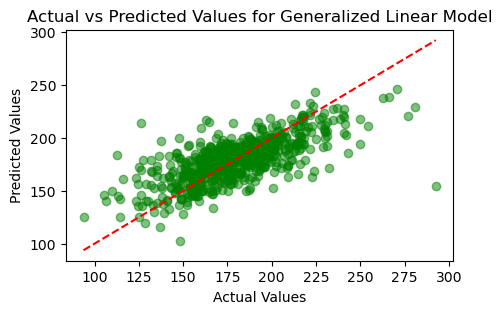

In [1118]:
#Actual vs. Predicted Plot For GLM
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_glm, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Generalized Linear Model')
plt.show()

In [1120]:
##Gradient Boosting Model (GBM)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Fit the Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(x_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
print(f"RMSE of Gradient Boosting Model: {rmse}")

RMSE of Gradient Boosting Model: 18.258177577169224


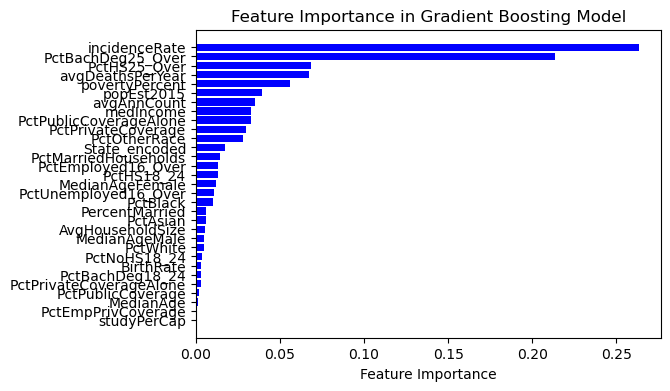

In [1122]:
##Gradient Boosting Model (GBM)
#Feature Importance Plot
import matplotlib.pyplot as plt
import numpy as np

# Feature Importance
feature_importance = gbm_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(6, 4))
plt.barh(x.columns[sorted_idx], feature_importance[sorted_idx], color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

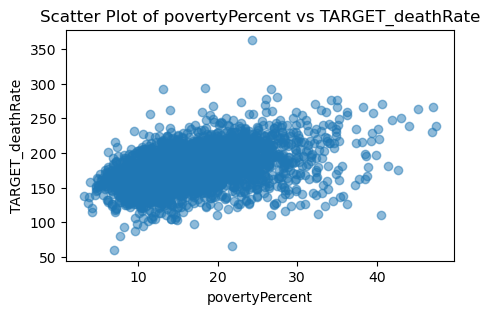

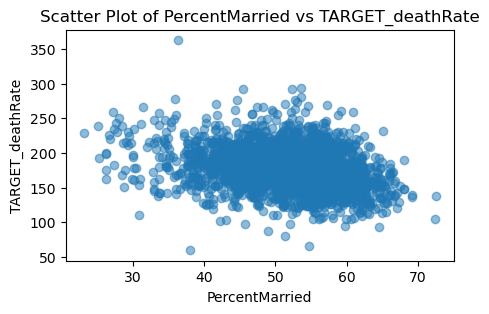

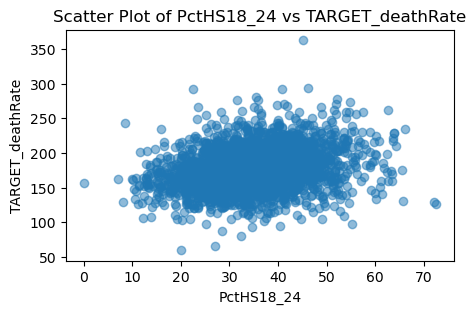

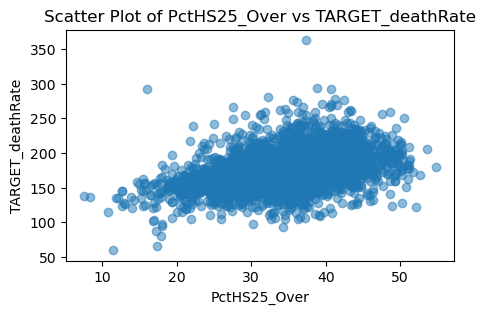

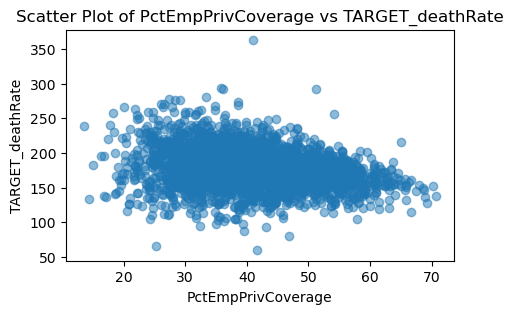

In [1124]:
#Top variables from GLM with low p-values and positive coefficients
#Scatterplot Showing GLM Variables with low p-values and positive coefficient values
import matplotlib.pyplot as plt

# List of the variables with low p-values and positive coefficients
significant_vars = ['povertyPercent', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctEmpPrivCoverage']  # Replace with actual variable names

# Create scatter plots for each significant variable
for var in significant_vars:
    plt.figure(figsize=(5, 3))
    plt.scatter(cancer_df[var], cancer_df['TARGET_deathRate'], alpha=0.5)
    plt.title(f'Scatter Plot of {var} vs TARGET_deathRate')
    plt.xlabel(var)
    plt.ylabel('TARGET_deathRate')
    plt.show()

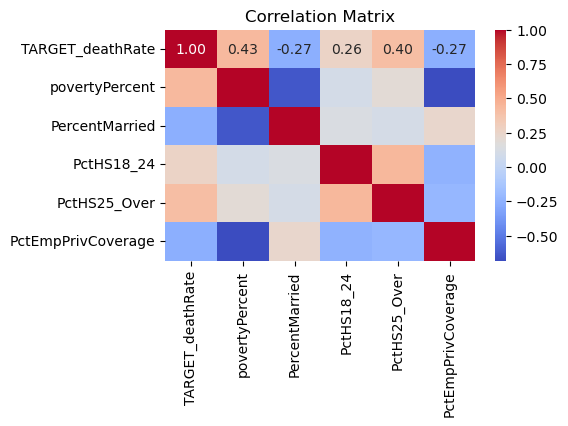

In [1126]:
#Correlation Matrix Showing GLM Variables with low p-values and positive coefficient values
import seaborn as sns

# Select columns of interest
important_vars = cancer_df[['TARGET_deathRate'] + significant_vars]

# Compute the correlation matrix
correlation_matrix = important_vars.corr()

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [1128]:
#Model for the States impact on Cancer Dataset
# Aggregate the mean death rate per state
state_impact = cancer_df.groupby('State_encoded')['TARGET_deathRate'].mean().reset_index()

# Rename columns for clarity
state_impact.columns = ['State', 'Mean_DeathRate']

# Display the first few rows to check
print(state_impact.head())

   State  Mean_DeathRate
0      0      192.728571
1      1      193.416667
2      2      149.086667
3      3      200.090667
4      4      158.096491


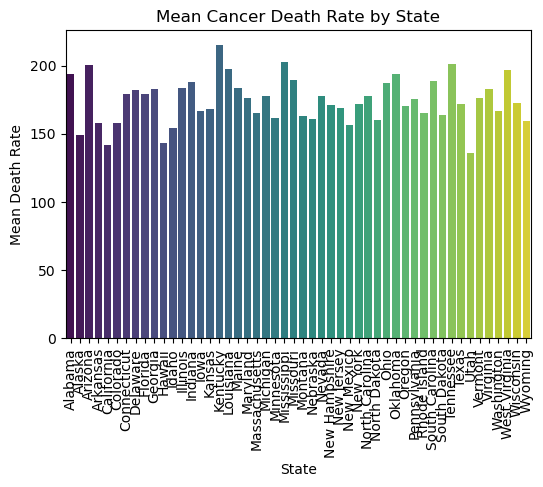

In [1130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example dictionary for mapping state codes to state names
state_mapping = {
    1: 'Alabama',
    2: 'Alaska',
    3: 'Arizona',
    4: 'Arkansas',
    5: 'California',
    6: 'Colorado',
    7: 'Connecticut',
    8: 'Delaware',
    9: 'Florida',
    10: 'Georgia',
    11: 'Hawaii',
    12: 'Idaho',
    13: 'Illinois',
    14: 'Indiana',
    15: 'Iowa',
    16: 'Kansas',
    17: 'Kentucky',
    18: 'Louisiana',
    19: 'Maine',
    20: 'Maryland',
    21: 'Massachusetts',
    22: 'Michigan',
    23: 'Minnesota',
    24: 'Mississippi',
    25: 'Missouri',
    26: 'Montana',
    27: 'Nebraska',
    28: 'Nevada',
    29: 'New Hampshire',
    30: 'New Jersey',
    31: 'New Mexico',
    32: 'New York',
    33: 'North Carolina',
    34: 'North Dakota',
    35: 'Ohio',
    36: 'Oklahoma',
    37: 'Oregon',
    38: 'Pennsylvania',
    39: 'Rhode Island',
    40: 'South Carolina',
    41: 'South Dakota',
    42: 'Tennessee',
    43: 'Texas',
    44: 'Utah',
    45: 'Vermont',
    46: 'Virginia',
    47: 'Washington',
    48: 'West Virginia',
    49: 'Wisconsin',
    50: 'Wyoming'
}

# Map the state names to the encoded values
state_impact['State_Name'] = state_impact['State'].map(state_mapping)

# Sort by state name for a more readable plot
state_impact = state_impact.sort_values('State_Name')

plt.figure(figsize= (6, 4))
sns.barplot(x='State_Name', y='Mean_DeathRate', data=state_impact, palette='viridis')
plt.title('Mean Cancer Death Rate by State')
plt.xlabel('State')
plt.ylabel('Mean Death Rate')
plt.xticks(rotation=90)
plt.show()